# EDA in NLP
- Basic Data Explorations
- Preprocess text
- EDA - Distributions, Sentimental Analysis, Visualization (WordCloud)


### 1. **Library Installation**


In [25]:
# Install libraries
! pip install nltk wordcloud

- **Purpose:** Install necessary libraries (`nltk` for natural language processing and `wordcloud` for visualizing word frequencies).

### 2. **Loading the Data**

In [26]:
# Load the data
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"
df = pd.read_csv(url, sep = "\t", header = None, names = ['Label', 'Message'])


- **`pd.read_csv(url, sep = "\t", header = None, names = ['Label', 'Message'])`:** 
  - **`url`**: URL to the dataset.
  - **`sep = "\t"`**: Specifies that the file is tab-separated.
  - **`header = None`**: Indicates that the file does not have a header row.
  - **`names = ['Label', 'Message']`**: Assigns column names for the dataset.

  - Since it's a TSV file, the separator should be a tab (\t).
  

### **CSV (Comma-Separated Values)**

- **Delimiter**: Uses a comma (`,`) to separate values.
- **File Extension**: Typically `.csv`.
- **Usage**: Widely used for data exchange due to its simplicity and compatibility with many applications, including spreadsheets and databases.
- **Example**:
  ```
  Name, Age, City
  John Doe, 28, New York
  Jane Smith, 34, Los Angeles
  ```

### **TSV (Tab-Separated Values)**

- **Delimiter**: Uses a tab character (`\t`) to separate values.
- **File Extension**: Typically `.tsv` or sometimes `.tab`.
- **Usage**: Preferred in contexts where data might include commas or where tab characters are less likely to be used within the data fields.
- **Example**:
  ```
  Name\tAge\tCity
  John Doe\t28\tNew York
  Jane Smith\t34\tLos Angeles
  ```









#### Below is the sample list of data
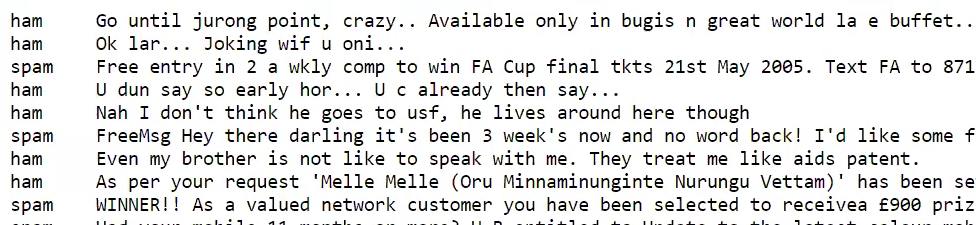

### 3. **Displaying the First Few Rows**

In [27]:
# Display the first few rows of the data
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- **Purpose:** Display the first five rows of the DataFrame to get an overview of the data.

### 4. **Basic Data Exploration**

In [28]:
#Check if there are any mising values in the data
df.isnull().sum()

Label      0
Message    0
dtype: int64

- **Purpose:** Check for missing values in the dataset by summing the number of null values in each column.


In [29]:
# Summary Statistics 
df['Label'].value_counts()

Label
ham     4825
spam     747
Name: count, dtype: int64

- **Purpose:** Show the count of each unique value in the 'Label' column to understand the distribution of classes (ham vs. spam).

### 5. **Text Preprocessing**


In [30]:
# Text preprocessesing
import string
import nltk
from nltk.corpus import stopwords
# Download the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/puskar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- **Purpose:** Import required modules and download stopwords for text preprocessing.


In [31]:
def preprocess_text(text):
    # Remove the punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert the text to lowercase
    text = text.lower()

    # remove stopwords and join all together
    text = " ".join([word for word in text.split() if word not in stopwords.words('english')])
    return text


- **`text.translate(str.maketrans('', '', string.punctuation))`**: Removes punctuation.
- **`text.lower()`**: Converts text to lowercase.
- **`" ".join([word for word in text.split() if word not in stopwords.words('english')])`**: Removes stopwords (common words that do not contribute to the meaning) from the text.


In [32]:
df['cleaned_message'] = df['Message'].apply(preprocess_text)
df.head()

,Label,Message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


- **Purpose:** Apply the `preprocess_text` function to each message in the 'Message' column and store the cleaned messages in a new column.

### 6. **Exploratory Data Analysis (EDA)**

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


- **Purpose:** Import libraries for data visualization (`seaborn` and `matplotlib`).


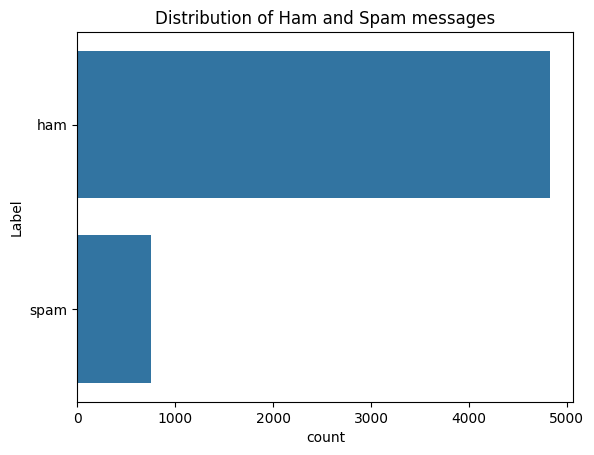

In [34]:
# Plot the label distribution
sns.countplot(df['Label'])
plt.title("Distribution of Ham and Spam messages")
plt.show()

- **`sns.countplot(df['Label'])`**: Creates a count plot showing the distribution of 'Label' (ham vs. spam).
- **`plt.title("Distribution of Ham and Spam messages")`**: Adds a title to the plot.
- **`plt.show()`**: Displays the plot.

### 7. **Word Cloud Visualization**

In [35]:
from wordcloud import WordCloud

- **Purpose:** Import the `WordCloud` class for generating word clouds.


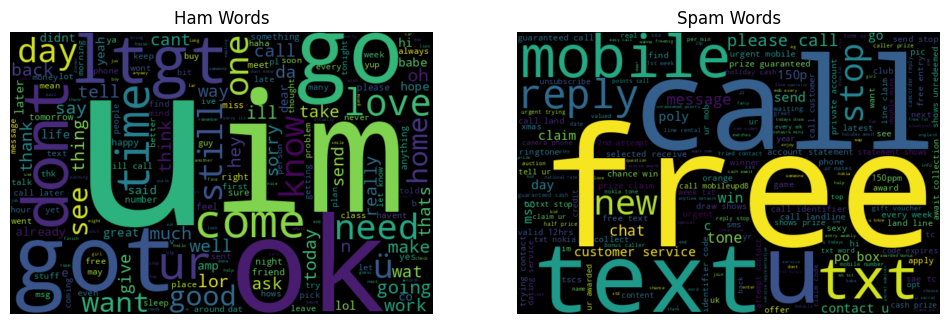

In [36]:
# Generate word cloud for ham and spam 
# - **Purpose:** Combine all cleaned messages for 'ham' and 'spam' into single strings for word cloud generation.
ham_words = ' '.join(df[df['Label'] == 'ham']['cleaned_message'])
spam_words = ' '.join(df[df['Label'] == 'spam']['cleaned_message'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wordcloud_ham = WordCloud(width = 600, height=400).generate(ham_words)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title("Ham Words")
plt.axis('off')


plt.subplot(1, 2, 2)
wordcloud_spam = WordCloud(width=600, height=400).generate(spam_words)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title("Spam Words")
plt.axis('off')

plt.show()

- **`plt.figure(figsize=(12, 6))`**: Sets the figure size for the plot.
- **`plt.subplot(1, 2, 1)`**: Creates the first subplot (1 row, 2 columns, first subplot).
- **`WordCloud(width = 600, height=400).generate(ham_words)`**: Generates a word cloud for 'ham' messages.
- **`plt.imshow(wordcloud_ham, interpolation='bilinear')`**: Displays the word cloud image.
- **`plt.title("Ham Words")`**: Adds a title to the subplot.
- **`plt.axis('off')`**: Hides the axis.
- **`plt.subplot(1, 2, 2)`**: Creates the second subplot (1 row, 2 columns, second subplot).
- **`WordCloud(width=600, height=400).generate(spam_words)`**: Generates a word cloud for 'spam' messages.

### 8. **Sentiment Analysis**

In [37]:
# Sentimental Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/puskar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

- **Purpose:** Import the `SentimentIntensityAnalyzer` from `nltk` for sentiment analysis and download the VADER lexicon.


In [38]:
# Innitialize the sentimenta analyzer
sia = SentimentIntensityAnalyzer()

# Apply the sentimental Analysis
df['sentiment'] = df['cleaned_message'].apply(lambda x: sia.polarity_scores(x)['compound'])


- **`sia.polarity_scores(x)['compound']`**: Computes the sentiment score for each message, specifically the compound score which reflects overall sentiment.


In [39]:
df.head()

,Label,Message,cleaned_message,sentiment
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,0.4019
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0.4767
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,0.7964
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,0.0000
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,-0.1027


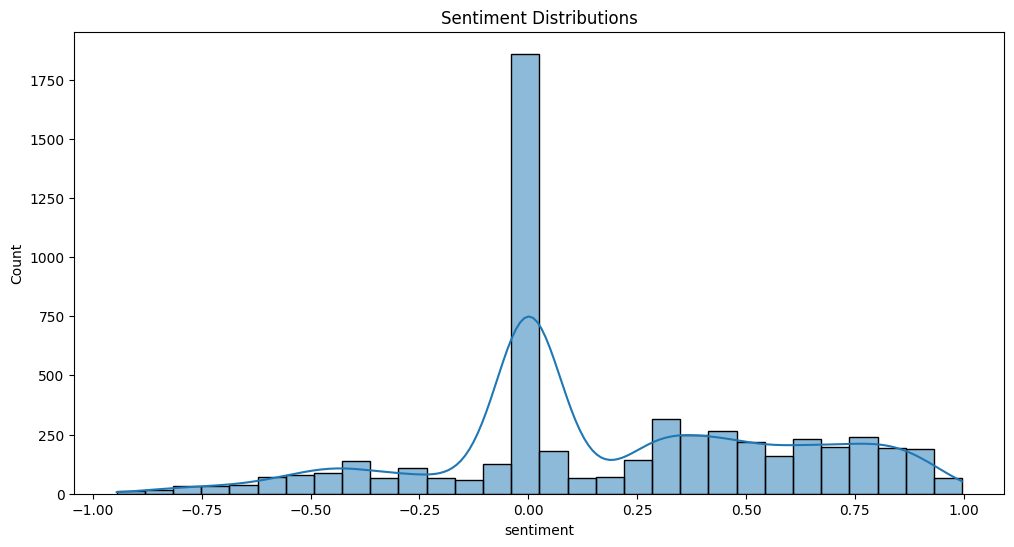

In [40]:
# Distribution of the sentiments
plt.figure(figsize=(12, 6))
sns.histplot(df['sentiment'], kde=True, bins = 30)
plt.title("Sentiment Distributions")
plt.show()

- **`sns.histplot(df['sentiment'], kde=True, bins = 30)`**: Creates a histogram with Kernel Density Estimate (KDE) for sentiment scores.
- **`plt.title("Sentiment Distributions")`**: Adds a title to the plot.

### 9. **Message Length Distribution**

In [41]:
df.head()

,Label,Message,cleaned_message,sentiment
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,0.4019
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0.4767
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,0.7964
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,0.0000
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,-0.1027


In [42]:
# Plot the message length distribution
df['message_length'] = df['Message'].apply(len)


- **Purpose:** Calculate the length of each message and store it in a new column.


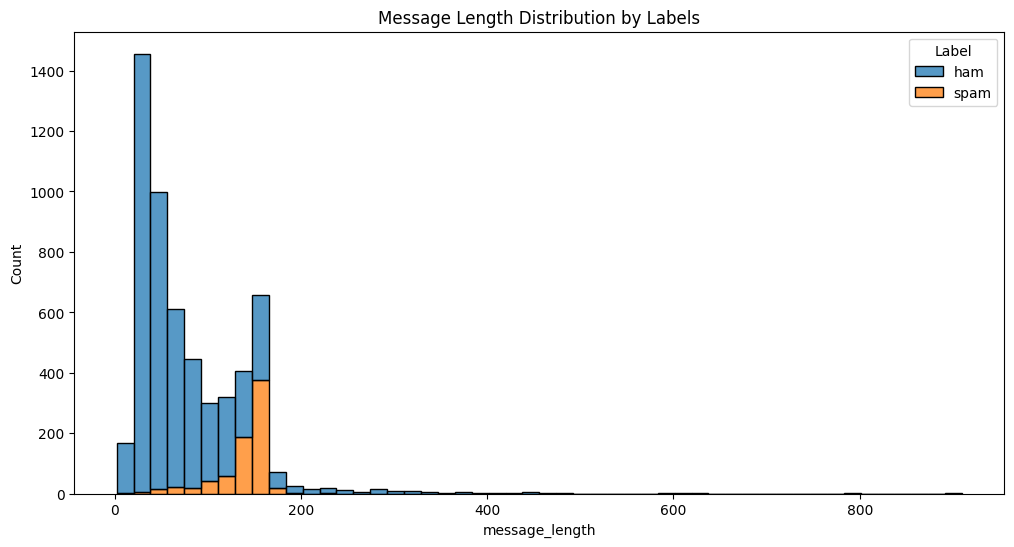

In [43]:

# Plot 
plt.figure(figsize=(12, 6))
sns.histplot(data = df, x = 'message_length', hue = 'Label', multiple='stack', bins = 50)
plt.title("Message Length Distribution by Labels")
plt.show()

- **`sns.histplot(data = df, x = 'message_length', hue = 'Label', multiple='stack', bins = 50)`**: Creates a stacked histogram showing the distribution of message lengths for different labels (ham vs. spam).
- **`plt.title("Message Length Distribution by Labels")`**: Adds a title to the plot.

This overview should help clarify the purpose of each step and parameter used in the code. Let me know if you have any more questions!